In [1]:
##import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

**Load and Visualize Dataset**

In [2]:
##load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

##dataset size
print("X_train shape: ", X_train.shape)
print("y_train shape:", y_train.shape)

print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
X_train shape:  (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape:  (10000, 32, 32, 3)
y_test shape:  (10000, 1)


In [3]:
##splitting into training and validation
X_train, y_train, X_val, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [4]:
print('X_train shape: ', X_train.shape)
print('X_val shape: ', X_val.shape)
print('y_train shape: ', y_train.shape)
print('y_val shape: ', y_val.shape)

X_train shape:  (40000, 32, 32, 3)
X_val shape:  (40000, 1)
y_train shape:  (10000, 32, 32, 3)
y_val shape:  (10000, 1)


We have 50k (32x32x3) training and 10k testing images.

In [3]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

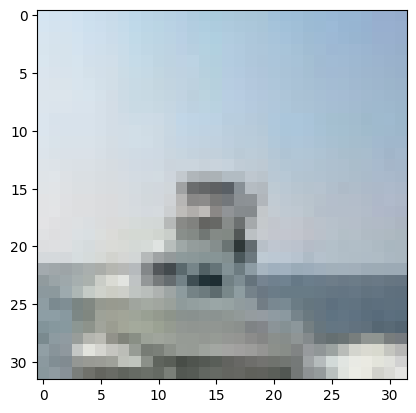

In [4]:
plt.imshow(X_train[100, ])

array([[[255, 255, 255],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[113, 120, 112],
        [111, 118, 111],
        [105, 112, 106],
        ...,
        [ 72,  81,  80],
        [ 72,  80,  79],
        [ 72,  80,  79]],

       [[111, 118, 110],
        [104, 111, 104],
        [ 99, 106,  98],
        ...,
        [ 68,  75,  73],
        [ 70,  76,  75],
        [ 78,  84,  82]],

       [[106, 113, 105],
        [ 99, 106,  98],
        [ 95, 102,  94],
        ...,
        [ 78,  85,  83],
        [ 79,  85,  83],
        [ 80,  86,  84]]], dtype=uint8)
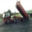

In [5]:
X_train[2, :]

<ipython-input-10-87d9978760a5>:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label_index = int(y_train[index])


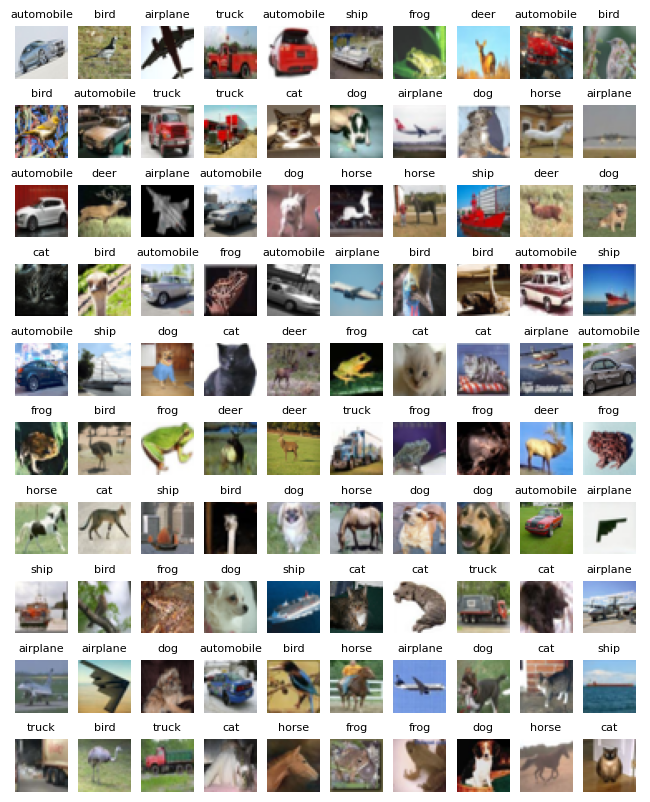

In [10]:
##labels list
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog',
          'horse', 'ship', 'truck']

###sample images

##subplot dims
n_col, n_row = 10, 10

fig, axes = plt.subplots(n_row, n_col, figsize = (8, 10))

axes = axes.ravel()

##train dataset size
n_train = len(X_train)

for i in np.arange(0, n_col*n_row):

  ##random index
  index = np.random.randint(0, n_train)

  ##plot image at index
  axes[i].imshow(X_train[index, :])
  label_index = int(y_train[index])
  axes[i].set_title(labels[label_index], fontsize = 8)
  axes[i].axis('off')

plt.subplots_adjust(hspace = 0.4)

In [7]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))

Text(0.5, 1.0, 'Class distribution in training dataset')

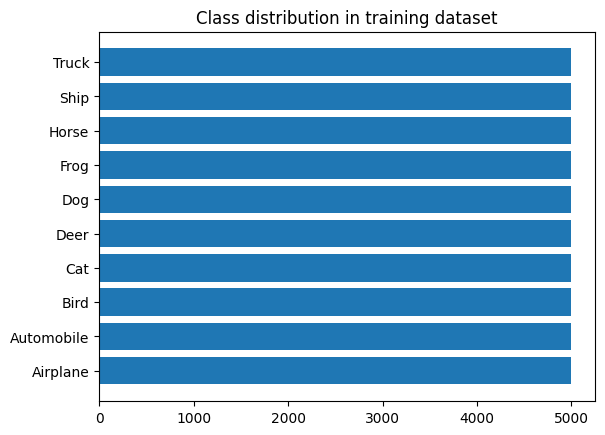

In [8]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog',
                'Frog', 'Horse', 'Ship', 'Truck']
classes, counts = np.unique(y_train, return_counts=True)
plt.barh(class_names, counts)
plt.title('Class distribution in training dataset')

Text(0.5, 1.0, 'Class distribution in testing dataset')

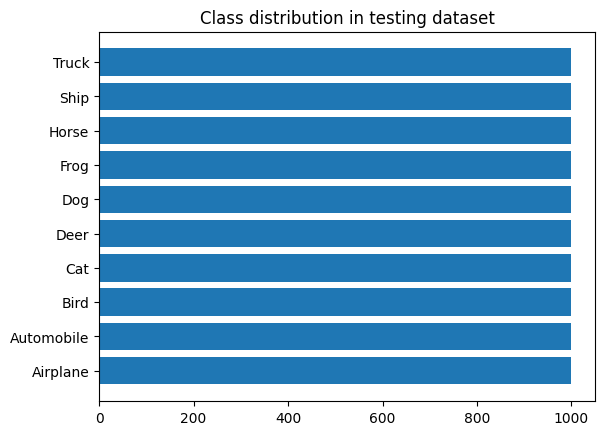

In [9]:
classes, counts = np.unique(y_test, return_counts=True)
plt.barh(class_names, counts)
plt.title('Class distribution in testing dataset')

The dataset is balanced, all classes have equal distribution.

 **Data pre-processing**

In [10]:
##normalization
X_train = X_train/255.0
X_test = X_test/255.0

##one-hot encoding of the target
##variable
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [11]:
y_test_cat.shape

(10000, 10)

**Model Building**

In [12]:
INPUT_SHAPE = (32, 32, 3)

model = Sequential()

##add layers

##convolutional layer
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape = INPUT_SHAPE,
                 activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape = INPUT_SHAPE,
                 activation = 'relu', padding = 'same'))
model.add(BatchNormalization())

##pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

##dropout layer
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size=(3,3), input_shape = INPUT_SHAPE,
                 activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size=(3,3), input_shape = INPUT_SHAPE,
                 activation = 'relu', padding = 'same'))
model.add(BatchNormalization())

##pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

##dropout layer
model.add(Dropout(0.25))

##convolutional layer
model.add(Conv2D(filters = 128, kernel_size = (3,3), input_shape = INPUT_SHAPE,
                 activation = 'relu', padding = 'same'))
model.add(BatchNormalization())

model.add(Conv2D(filters = 128, kernel_size = (3,3), input_shape = INPUT_SHAPE,
                 activation = 'relu', padding = 'same'))
model.add(BatchNormalization())

##pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

##dropout layer
model.add(Dropout(0.25))

##flatten
model.add(Flatten())

##Dense layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

##metrics
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name = 'precision'),
    tf.keras.metrics.Recall(name = 'recall')
]
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = METRICS)
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 552,362 (2.11 MB)

 Trainable params: 551,466 (2.10 MB)

 Non-trainable params: 896 (3.50 KB)

**Early stopping**

In [13]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 2)

**Data Augmentation**

In [17]:
##batch_size
batch_size = 32

data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1,
                                    horizontal_flip = True)
train_generator = data_generator.flow(X_train, y_train_cat, batch_size)
steps_per_epoch = X_train.shape[0]//batch_size

##fit model
history = model.fit(
    train_generator,
    epochs = 50,
    steps_per_epoch = steps_per_epoch,
    validation_data = (X_test, y_test_cat)
)

Epoch 1/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 4:41 180ms/step - accuracy: 0.7500 - loss: 0.6615 - precision: 0.8333 - recall: 0.6250

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.7792 - loss: 0.6476 - precision: 0.8534 - recall: 0.7127 - val_accuracy: 0.8111 - val_loss: 0.5669 - val_precision: 0.8641 - val_recall: 0.7592
Epoch 2/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.8125 - loss: 0.4545 - precision: 0.9231 - recall: 0.7500

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8125 - loss: 0.4545 - precision: 0.9231 - recall: 0.7500 - val_accuracy: 0.8105 - val_loss: 0.5671 - val_precision: 0.8639 - val_recall: 0.7593
Epoch 3/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 54s 34ms/step - accuracy: 0.7890 - loss: 0.6203 - precision: 0.8574 - recall: 0.7263 - val_accuracy: 0.8018 - val_loss: 0.5822 - val_precision: 0.8600 - val_recall: 0.7566
Epoch 4/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 497us/step - accuracy: 0.7500 - loss: 0.5776 - precision: 0.8077 - recall: 0.6562 - val_accuracy: 0.8006 - val_loss: 0.5907 - val_precision: 0.8572 - val_recall: 0.7539
Epoch 5/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.7937 - loss: 0.6106 - precision: 0.8597 - recall: 0.7316 - val_accuracy: 0.7815 - val_loss: 0.6671 - val_precision: 0.8342 - val_recall: 0.7406
Epoch 6/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 840us/step - accuracy: 0.7500 - loss: 0.5843 - precision: 0.8333 - recall: 0.6250 - val_accuracy: 0.7801 - val_l

**Model Evaluation**

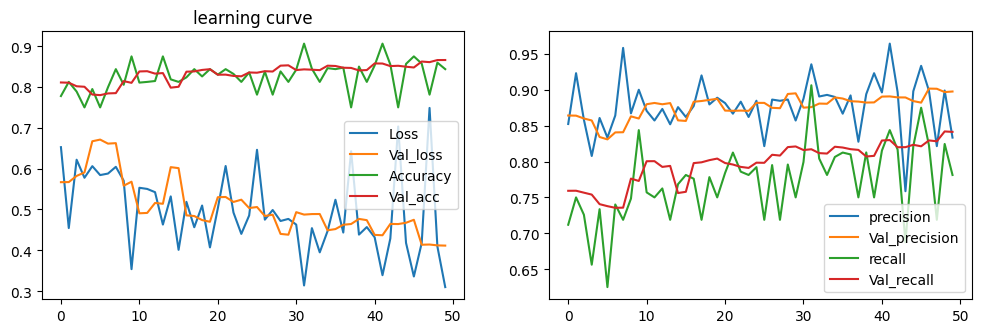

In [18]:
##set figsize
plt.figure(figsize = (12, 16))

##plot training curve
plt.subplot(4, 2, 1)
plt.plot(history.history['loss'], label = 'Loss')
plt.plot(history.history['val_loss'], label = 'Val_loss')
plt.plot(history.history['accuracy'], label = 'Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val_acc')
plt.title('learning curve')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(history.history['precision'], label = 'precision')
plt.plot(history.history['val_precision'], label = 'Val_precision')
plt.plot(history.history['recall'], label = 'recall')
plt.plot(history.history['val_recall'], label = 'Val_recall')
plt.legend()

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8698 - loss: 0.4072 - precision: 0.9001 - recall: 0.8446
Test Accuracy: 86.61%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


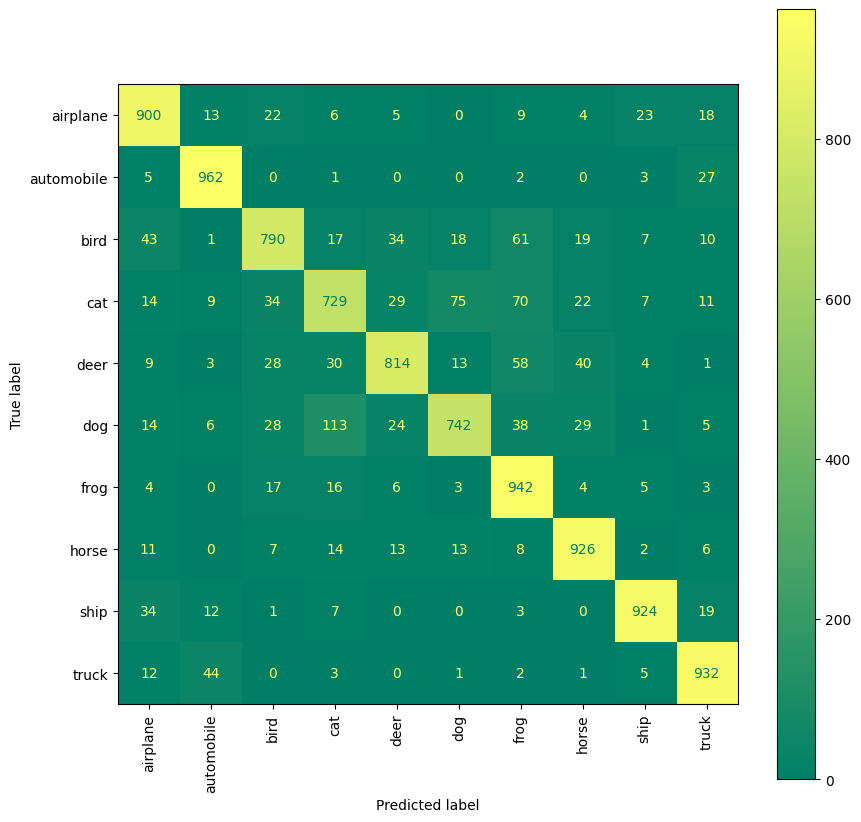

In [19]:
evaluation = model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {evaluation[1]*100:.2f}%")

##prediction on test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

##confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

##plot the cm
fig, ax = plt.subplots(figsize = (10, 10))
disp = disp.plot(xticks_rotation = 'vertical', ax = ax, cmap = 'summer')
plt.show()


In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1000
           1       0.92      0.96      0.94      1000
           2       0.85      0.79      0.82      1000
           3       0.78      0.73      0.75      1000
           4       0.88      0.81      0.85      1000
           5       0.86      0.74      0.80      1000
           6       0.79      0.94      0.86      1000
           7       0.89      0.93      0.91      1000
           8       0.94      0.92      0.93      1000
           9       0.90      0.93      0.92      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.86     10000
weighted avg       0.87      0.87      0.86     10000

